<a href="https://colab.research.google.com/github/lalxth/Digit_Recognition_using_Tensorflow_with_Mnist_Dataset/blob/main/Digit_Recognition_with_own_test_image_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mnist Digit Recognition Problem

In [227]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [228]:
import numpy as np
from numpy import asarray
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import platform
import datetime
import math
import cv2
from PIL import Image,ImageDraw

print("Python Version:", platform.python_version())
print("Tensorflow Version:" , tf.__version__)
print("Keras Version:" , tf.keras.__version__)

Python Version: 3.9.16
Tensorflow Version: 2.11.0
Keras Version: 2.11.0


In [229]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [230]:
mnist_dataset = tf.keras.datasets.mnist
(x_train , y_train),(x_test , y_test)= mnist_dataset.load_data()

In [231]:
print("x_train:", x_train.shape)
print("y_train:" , y_train.shape)
print("x_test:" , x_test.shape)
print("y_test:" , y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [232]:
(_,img_height,img_width) = x_train.shape
img_channel = 1

print("Image_Height:", img_height)
print("Image_Width:", img_width)
print("Image_Channel:" , img_channel)

Image_Height: 28
Image_Width: 28
Image_Channel: 1


In [233]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


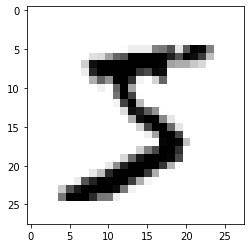

In [234]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)
plt.show()

In [235]:
x_train_with_channel = x_train.reshape(x_train.shape[0],img_height,img_width,img_channel)
x_test_with_channel = x_test.reshape(x_test.shape[0],img_height,img_width,img_channel)


print("x_train_with_channel:" , x_train_with_channel.shape)
print("x_test_with_channel:", x_test_with_channel.shape)


x_train_with_channel: (60000, 28, 28, 1)
x_test_with_channel: (10000, 28, 28, 1)


In [236]:
x_train_normalise = x_train_with_channel / 255
x_test_normalise = x_test_with_channel / 255

In [237]:
x_train_normalise[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [238]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(
    input_shape = (img_height,img_width,img_channel),
    kernel_size = 5,
    filters = 8,
    strides = 1,
    activation = tf.keras.activations.relu ,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size = (2,2),
    strides = (2,2)
))

model.add(tf.keras.layers.Conv2D(
    kernel_size = 5,
    filters = 16,
    strides = 1,
    activation = tf.keras.activations.relu ,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size = (2,2),
    strides = (2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units = 128 ,
    activation = tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = tf.keras.activations.softmax,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

In [239]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

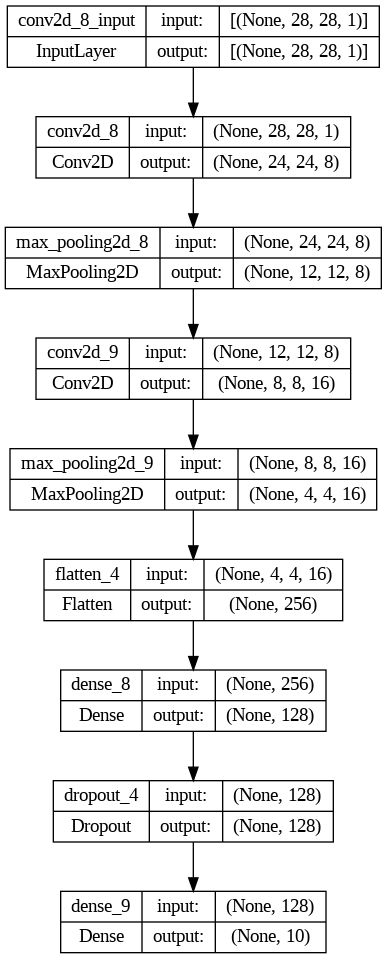

In [240]:
tf.keras.utils.plot_model( model ,show_shapes = True , show_layer_names = True)

In [241]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(
    optimizer = adam_optimizer ,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics =['accuracy']
)

In [242]:
log_dir = ".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir , histogram_freq =1)

training_history = model.fit(
    x_train_normalise ,
    y_train ,
    epochs = 10 ,
    validation_data = (x_train_normalise , y_train),
    callbacks = [tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1990 - accuracy: 0.9390 - val_loss: 0.0761 - val_accuracy: 0.9761
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.0442 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0269 - val_accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0226 - val_accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0230 - val_accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0131 -

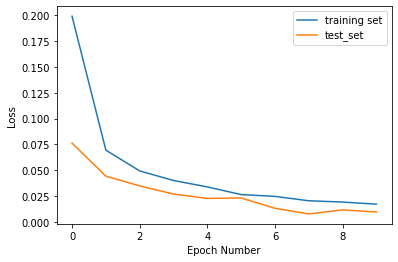

In [243]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label ="training set")
plt.plot(training_history.history['val_loss'] , label="test_set")
plt.legend()



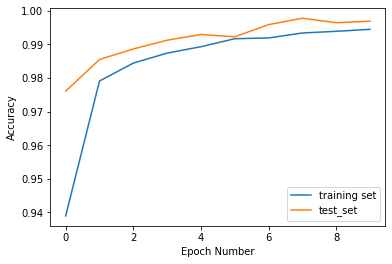

In [244]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label ="training set")
plt.plot(training_history.history['val_accuracy'] , label="test_set")
plt.legend()

In [245]:
%%capture

train_loss , train_accuracy = model.evaluate(x_train_normalise , y_train)



In [246]:
print("Training Loss:" , train_loss)
print("Training Accuray:" , train_accuracy)

Training Loss: 0.009469962678849697
Training Accuray: 0.9968833327293396


In [247]:
%%capture

test_loss , test_accuracy = model.evaluate(x_test_normalise , y_test)


In [248]:
print("Testing Loss:" , test_loss)
print("Testing Accuracy:" , test_accuracy)

Testing Loss: 0.027373293414711952
Testing Accuracy: 0.9922000169754028


In [249]:
model_name = "digits_recognition_cnn.h5"
model.save(model_name , save_format ='h5')

In [250]:
loaded_model = tf.keras.models.load_model(model_name)

In [251]:
predict_one_hot = loaded_model.predict([x_test_normalise])

313/313 [==============================] - 2s 6ms/step


In [252]:
print("Predicted one hot", predict_one_hot.shape)

Predicted one hot (10000, 10)


In [253]:
predictions = np.argmax(predict_one_hot , axis = 1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [254]:
print(predictions[61])

8


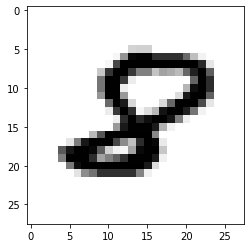

In [255]:
plt.imshow(x_test_normalise[61].reshape((img_height , img_width)) , cmap=plt.cm.binary)
plt.show()

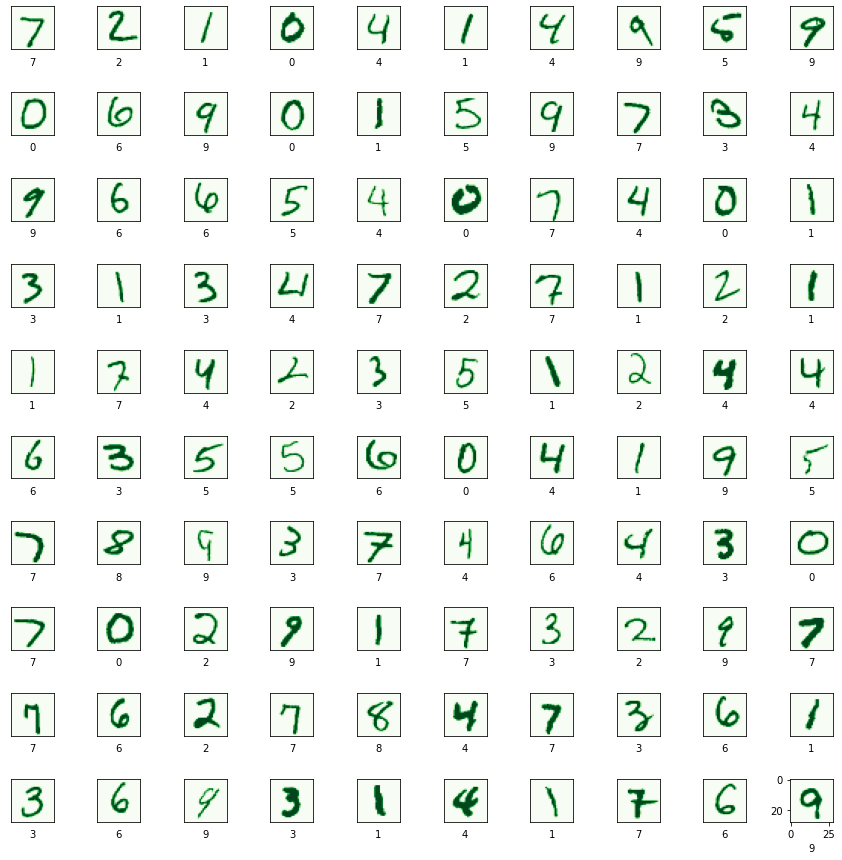

In [256]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15,15))

for plot_index in range(numbers_to_display):
  predicted_label = predictions[plot_index]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
  plt.subplot(num_cells , num_cells , plot_index + 1)
  plt.imshow(x_test_normalise[plot_index].reshape((img_height,img_width)) , cmap = color_map)
  plt.xlabel(predicted_label)

plt.subplots_adjust(hspace = 1 , wspace = 0.5)
plt.show()

In [257]:
test_image = Image.open( "./test_image.jpg")

In [258]:
print(test_image.width , test_image.height)
test_image

28 21


In [259]:
test_image = test_image.resize((28,28))

In [260]:
test_image = test_image.convert('L')

In [261]:
numpydata = asarray(test_image)
print(numpydata.shape)
test_with_channel = numpydata.reshape(1,28,28,1)
test_normalised = test_with_channel / 255
test_normalised[0][1]


(28, 28)


array([[0.82352941],
       [0.82352941],
       [0.82352941],
       [0.82352941],
       [0.82352941],
       [0.82352941],
       [0.81960784],
       [0.81960784],
       [0.83137255],
       [0.81176471],
       [0.81568627],
       [0.81960784],
       [0.80392157],
       [0.78823529],
       [0.7372549 ],
       [0.65882353],
       [0.67843137],
       [0.67843137],
       [0.6627451 ],
       [0.65098039],
       [0.63529412],
       [0.61176471],
       [0.58431373],
       [0.56470588],
       [0.5372549 ],
       [0.50980392],
       [0.47843137],
       [0.45490196]])

In [262]:
predict_one_hot = loaded_model.predict([test_normalised])

1/1 [==============================] - 0s 29ms/step


In [263]:
print("Predicted one hot", predict_one_hot.shape)

Predicted one hot (1, 10)


In [264]:
predictions = np.argmax(predict_one_hot , axis = 1)

In [265]:
print(predictions[0])

8


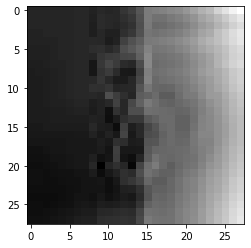

In [266]:
plt.imshow(test_normalised[0].reshape((img_height , img_width)) , cmap=plt.cm.binary)
plt.show()